In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
from PIL import Image
import torch
from torchvision import transforms

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNetV2
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import pandas as pd

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
# Обработка данных
import pandas as pd
import numpy as np

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import plotly.express as px

# Предобработка и разбиение данных
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA

# Моделирование и оценка
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score, make_scorer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.svm import SVC

# TensorFlow для нейросетей
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation


# Сохранение и загрузка моделей
import joblib
from google.colab import files

# Управление предупреждениями
import warnings
warnings.filterwarnings("ignore")

import os
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
import os
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import shutil

def fetch_image_urls(query, max_links_to_fetch, headers):
    search_url = f"https://www.google.com/search?q={query}&tbm=isch"
    response = requests.get(search_url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    image_urls = set()

    for img_tag in soup.find_all("img"):
        img_url = img_tag.get("src")
        if img_url:
            image_urls.add(urljoin(search_url, img_url))
        if len(image_urls) >= max_links_to_fetch:
            break

    return image_urls

def download_images(image_urls, save_dir):
    os.makedirs(save_dir, exist_ok=True)

    for i, img_url in enumerate(image_urls):
        try:
            response = requests.get(img_url, stream=True)
            if response.status_code == 200:
                file_path = os.path.join(save_dir, f"image_{i}.jpg")
                with open(file_path, 'wb') as file:
                    shutil.copyfileobj(response.raw, file)
            del response
        except Exception as e:
            print(f"Could not download {img_url} - {e}")

def main():
    breeds = ['siamese cat', 'persian cat', 'maine coon cat']
    base_dir = '/content/sample_data'
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
    }

    for breed in breeds:
        print(f"Fetching images for {breed}")
        image_urls = fetch_image_urls(breed, 15, headers)
        save_dir = os.path.join(base_dir, breed.replace(' ', '_'))
        download_images(image_urls, save_dir)

if __name__ == "__main__":
    main()

Fetching images for siamese cat
Fetching images for persian cat
Fetching images for maine coon cat


In [ ]:
import os
import csv

# Путь к основной папке с изображениями
base_path = '/content/sample_data/'

# Название выходного CSV файла
csv_filename = 'cat_labels.csv'

# Открываем файл для записи
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Записываем заголовки
    writer.writerow(['filename', 'label'])

    # Проходим по всем подкаталогам в base_path
    for breed in os.listdir(base_path):
        breed_path = os.path.join(base_path, breed)
        if os.path.isdir(breed_path):
            # Проходим по всем файлам в подкаталоге
            for image_name in os.listdir(breed_path):
                # Полный путь к изображению
                image_path = os.path.join(breed_path, image_name)
                # Записываем имя файла и метку (породу)
                writer.writerow([image_path, breed])

print(f"CSV файл '{csv_filename}' успешно создан.")


CSV файл 'cat_labels.csv' успешно создан.


In [ ]:
# Путь к основной папке с изображениями
image_folder = '/content/sample_data'

# Получение списка всех подкаталогов (пород)
breeds = [d for d in os.listdir(image_folder) if os.path.isdir(os.path.join(image_folder, d))]

# Создание списка для хранения данных
data = []

# Проход по каждой породе
for breed in breeds:
    breed_folder = os.path.join(image_folder, breed)

    # Получение списка всех файлов изображений в папке породы
    image_files = [f for f in os.listdir(breed_folder) if os.path.isfile(os.path.join(breed_folder, f))]

    # Добавление информации о каждом изображении в список данных
    for image_file in image_files:
        image_path = os.path.join(breed_folder, image_file)
        data.append({'id': os.path.splitext(image_file)[0], 'label': breed, 'image_path': image_path})

# Создание DataFrame из собранных данных
labels_df = pd.DataFrame(data)

# Просмотр обновленного DataFrame
print(labels_df.head(30))

          id           label                                        image_path
0   image_13  maine_coon_cat  /content/sample_data/maine_coon_cat/image_13.jpg
1    image_2  maine_coon_cat   /content/sample_data/maine_coon_cat/image_2.jpg
2    image_5  maine_coon_cat   /content/sample_data/maine_coon_cat/image_5.jpg
3   image_10  maine_coon_cat  /content/sample_data/maine_coon_cat/image_10.jpg
4    image_7  maine_coon_cat   /content/sample_data/maine_coon_cat/image_7.jpg
5    image_6  maine_coon_cat   /content/sample_data/maine_coon_cat/image_6.jpg
6    image_8  maine_coon_cat   /content/sample_data/maine_coon_cat/image_8.jpg
7    image_9  maine_coon_cat   /content/sample_data/maine_coon_cat/image_9.jpg
8    image_1  maine_coon_cat   /content/sample_data/maine_coon_cat/image_1.jpg
9    image_4  maine_coon_cat   /content/sample_data/maine_coon_cat/image_4.jpg
10  image_12  maine_coon_cat  /content/sample_data/maine_coon_cat/image_12.jpg
11  image_11  maine_coon_cat  /content/sample_data/m

In [ ]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          42 non-null     object
 1   label       42 non-null     object
 2   image_path  42 non-null     object
dtypes: object(3)
memory usage: 1.1+ KB


In [ ]:
labels_df['label'].nunique()

3

In [ ]:
labels_df.head()

,id,label,image_path
0,image_13,maine_coon_cat,/content/sample_data/maine_coon_cat/image_13.jpg
1,image_2,maine_coon_cat,/content/sample_data/maine_coon_cat/image_2.jpg
2,image_5,maine_coon_cat,/content/sample_data/maine_coon_cat/image_5.jpg
3,image_10,maine_coon_cat,/content/sample_data/maine_coon_cat/image_10.jpg
4,image_7,maine_coon_cat,/content/sample_data/maine_coon_cat/image_7.jpg


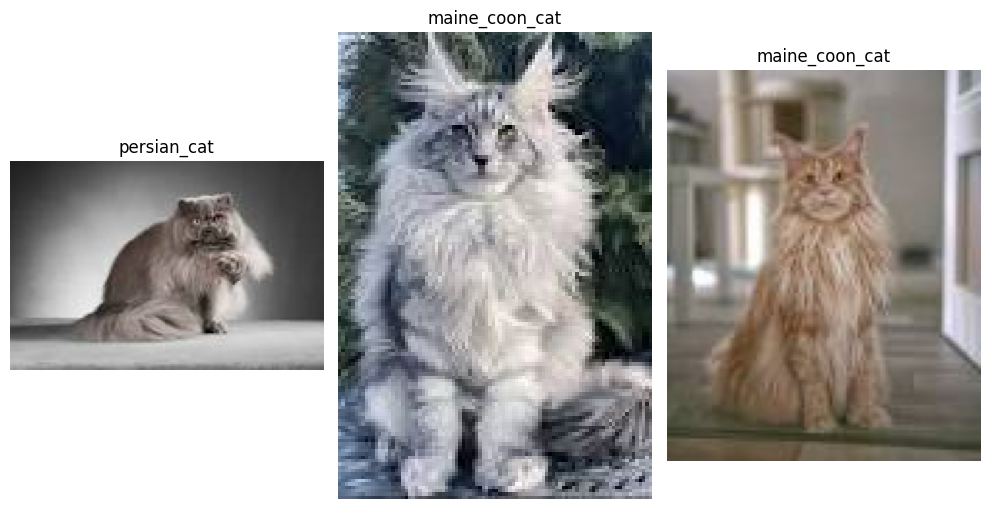

In [ ]:
# Выбор случайных индексов из DataFrame
sample_indices = labels_df.sample(n=num_images, replace=False).index

plt.figure(figsize=(10, 5))


for i, idx in enumerate(sample_indices):
    img_path = labels_df.loc[idx, 'image_path']
    img = mpimg.imread(img_path)


    plt.subplot(1, num_images, i + 1)
    plt.imshow(img)
    plt.title(labels_df.loc[idx, 'label'])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
train_df, test_df = train_test_split(labels_df, test_size=0.2, stratify=labels_df['label'], random_state=42)

In [ ]:
# Создание генераторов изображений
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col='label',
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='image_path',
    y_col='label',
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical'
)

Found 33 validated image filenames belonging to 3 classes.
Found 9 validated image filenames belonging to 3 classes.


In [ ]:
# Создание модели CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
model.fit(train_generator, epochs=10, validation_data=test_generator)

# Оценка модели на тестовом наборе
loss, accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {accuracy:.2f}')

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 425ms/step - accuracy: 0.1714 - loss: 3.6971 - val_accuracy: 0.3333 - val_loss: 1.3878
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 340ms/step - accuracy: 0.4470 - loss: 1.5723 - val_accuracy: 0.3333 - val_loss: 1.0944
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 548ms/step - accuracy: 0.3108 - loss: 1.0038 - val_accuracy: 0.3333 - val_loss: 1.1198
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 559ms/step - accuracy: 0.4237 - loss: 1.0445 - val_accuracy: 0.3333 - val_loss: 1.1102
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 387ms/step - accuracy: 0.6792 - loss: 0.9471 - val_accuracy: 0.3333 - val_loss: 1.0723
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 331ms/step - accuracy: 0.8006 - loss: 0.6782 - val_accuracy: 0.3333 - val_loss: 1.1423
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 343ms/step - accuracy: 0.9520 - loss: 0.4384 - val_accuracy: 0.3333 - val_loss: 1.5906
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 329ms/step - accuracy: 0.6661 - loss: 0.5664 - val_accuracy: 0.2222 - val_loss:

In [ ]:
model.save('your_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


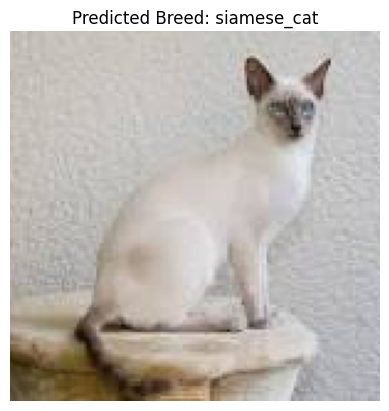

In [ ]:
# Загрузка обученной модели
model = load_model('/content/your_model.keras')

# Словарь для сопоставления индексов классов с названиями пород
class_indices = {'maine_coon_cat': 0, 'persian_cat': 1, 'siamese_cat': 2}
class_labels = {v: k for k, v in class_indices.items()}

def predict_breed(image_path):
    # Загрузка изображения
    img = load_img(image_path, target_size=(150, 150))

    # Преобразование изображения в массив
    img_array = img_to_array(img)

    # Нормализация изображения
    img_array /= 255.0

    # Добавление оси для батча
    img_array = np.expand_dims(img_array, axis=0)

    # Предсказание класса
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = class_labels[predicted_class_index]

    # Вывод изображения и предсказанного класса
    plt.imshow(img)
    plt.title(f'Predicted Breed: {predicted_class_label}')
    plt.axis('off')
    plt.show()

image_path = '/content/sample_data/siamese_cat/image_2.jpg'
predict_breed(image_path)

In [ ]:
train_generator.class_indices


{'maine_coon_cat': 0, 'persian_cat': 1, 'siamese_cat': 2}